In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
!pip install pandas
!pip install mplfinance
!pip install yahoo_fin

--2020-08-24 02:55:29--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-08-24 02:55:29--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-08-24 02:55:29--  https://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving versaweb.dl.so

# Obtener datos con biblioteca yahoo_fin

**Se obtienen los datos de la acción asignada en la variable "ticker" desde "start_date" hasta el "end_date" con intervalo por defecto de 1 día.**

**Las columnas que obtenemos son: fecha, precios de apertura, más alto, más bajo, cierre y volúmen.**

### yahoo-fin

**Python 3 package to:**
- Scrape historical stock price data
- Provide current information on market caps
- Dividend yields
- Stocks that comprise the major exchanges
- Income statements
- Balance sheets
- Cash flows
- Holder information
- Analyst data
- Get live stock prices
- Capture cryptocurrency data
- Get the most actively traded stocks on a current trading day

http://theautomatic.net/yahoo_fin-documentation/

https://pypi.org/project/yahoo-fin/

### mplfinance
**matplotlib utilities for the visualization, and visual analysis, of financial data**

https://github.com/matplotlib/mplfinance

                   Open         High          Low        Close    Volume
2019-04-12   270.220001   271.950012   266.829987   267.700012   6746000
2019-04-15   268.630005   268.880005   258.630005   266.380005  10038600
2019-04-16   265.750000   275.000000   264.720001   273.359985   7272900
2019-04-17   274.750000   274.790009   268.540009   271.230011   5126500
2019-04-18   271.230011   274.839996   269.750000   273.260010   5876300
...                 ...          ...          ...          ...       ...
2020-08-17  1677.000000  1845.859985  1672.829956  1835.640015  20242300
2020-08-18  1898.989990  1923.900024  1845.109985  1887.089966  16474500
2020-08-19  1865.000000  1911.000000  1841.209961  1878.530029  12205300
2020-08-20  1860.680054  2021.989990  1857.060059  2001.829956  20611800
2020-08-21  2044.760010  2095.489990  2025.050049  2049.979980  21428800

[344 rows x 5 columns]


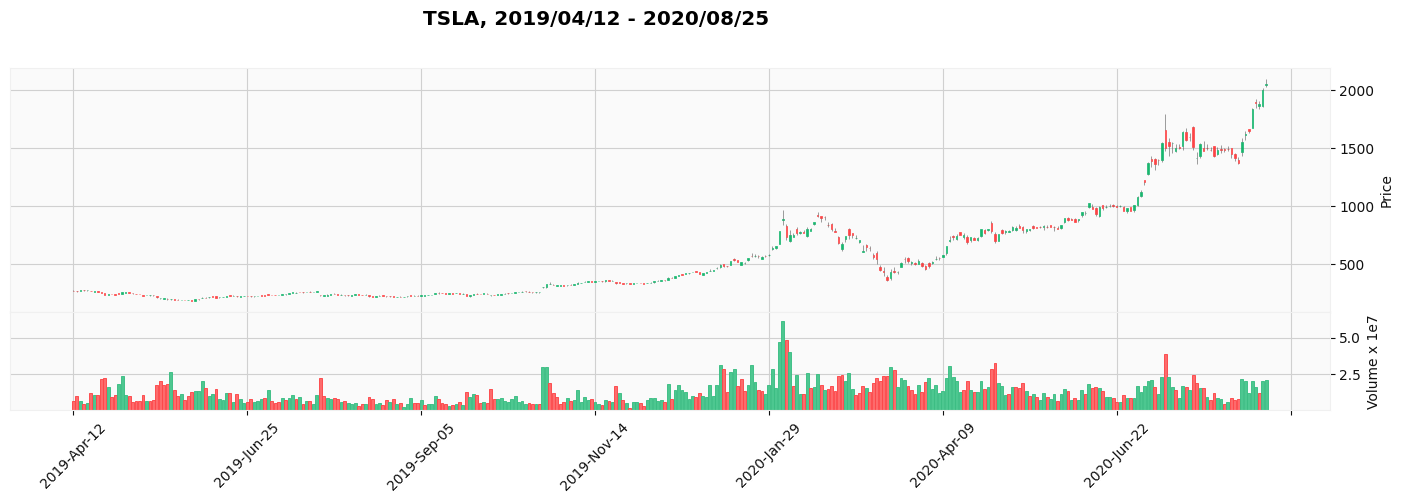

In [ ]:
import mplfinance as mpf
import pandas as pd
import yahoo_fin.stock_info as yf
from datetime import date
from datetime import timedelta

ticker = "TSLA"
start_date = date.today() - timedelta(days=500)
end_date = date.today() + timedelta(days=1)

start_date = start_date.strftime("%Y/%m/%d")
end_date= end_date.strftime("%Y/%m/%d")

# Default Interval is 1 day
data = yf.get_data(ticker, start_date = start_date, end_date= end_date,
                index_as_date= False)

data_candle = yf.get_data(ticker, start_date = start_date, end_date= end_date,
                index_as_date= True)

del data_candle['adjclose']
del data_candle['ticker']
data_candle.rename(columns={'open':'Open',
                            'high':'High',
                            'low':'Low',
                            'close': 'Close',
                            'volume': 'Volume'}, 
                            inplace=True)
print(data_candle)
kwargs = dict(type = 'candle', volume = True, figratio=(30,8), figscale=0.85)
mpf.plot(data_candle, **kwargs, style = 'yahoo', title = '{}, {} - {}'.format(ticker, start_date, end_date))

# Analizar datos con biblioteca TA-Lib

**Luego creamos un diccionario "inputs" con los datos de las columnas que necesitamos para calcular los indicadores técnicos de bolsa.**

**Cada columna se convierte a una serie pandas.**

**Utilizamos las columnas: open, high, low, close y volume.**

**Documentación ta-lib**

https://github.com/mrjbq7/ta-lib

https://sourceforge.net/p/ta-lib/code/HEAD/tree/trunk/ta-lib/c/src/ta_func/ta_MA.c#l139

In [ ]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt

inputs = {
    'open': pd.Series(data['open']),
    'high': pd.Series(data['high']),
    'low': pd.Series(data['low']),
    'close': pd.Series(data['close']),
    'adjclose': pd.Series(data['adjclose']),
    'volume': pd.Series(data['volume'])
}

# Gráficos de indicadores con matplotlib

# Indicador Estocástico

**Normalmente, el oscilador estocástico se utiliza para tres cosas; identificar los niveles de sobrecompra y sobreventa, detectar las divergencias, así como identificar estructuras y señales bajistas o alcistas.**

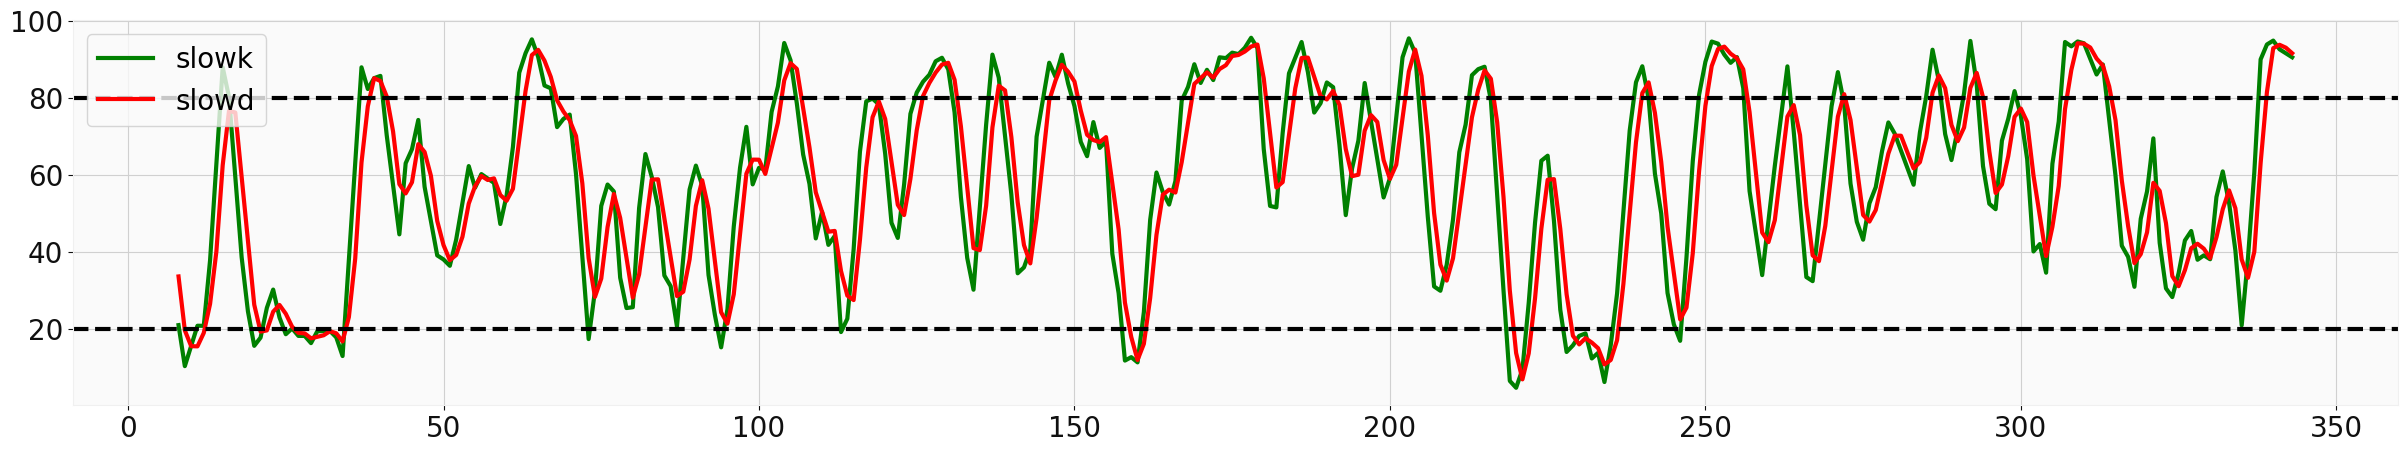

In [ ]:
slowk, slowd = talib.STOCH(inputs['high'], inputs['low'], inputs['close'],
                     fastk_period=5,
                     slowk_period=3, slowk_matype=0,
                     slowd_period=3, slowd_matype=0)

plt.plot(slowk, color='green', linewidth=3, label='slowk')
plt.plot(slowd, color='red', linewidth=3, label='slowd')
plt.axhline(80, 0, 100, color='black', linestyle='dashed', linewidth=3)
plt.axhline(20, 0, 100, color='black', linestyle='dashed', linewidth=3)
plt.legend(loc=2)
plt.rcParams['figure.figsize'] = [30, 5]
plt.rcParams.update({'font.size': 20})
plt.show()

# Índice de movimiento direccional (DMI)

**El Índice de Movimiento Direccional (DMI) es en realidad una serie de tres distintos indicadores combinados en uno.**

**Consiste en el Índice Direccional Medio (ADX), el Indicador Direccional Positivo (+DI) y el Indicador Direccional Negativo (-DI).**

La finalidad de DMI es definir si existe o no una tendencia. En ningún momento tiene en cuenta la dirección. 

Los otros dos indicadores (+DI y -DI) se utilizan para complementar al ADX. Sirven para determinar la dirección de la tendencia. 

Al combinar estos tres indicadores, el analista técnico puede determinar y medir la fuerza de una tendencia, así como su dirección.

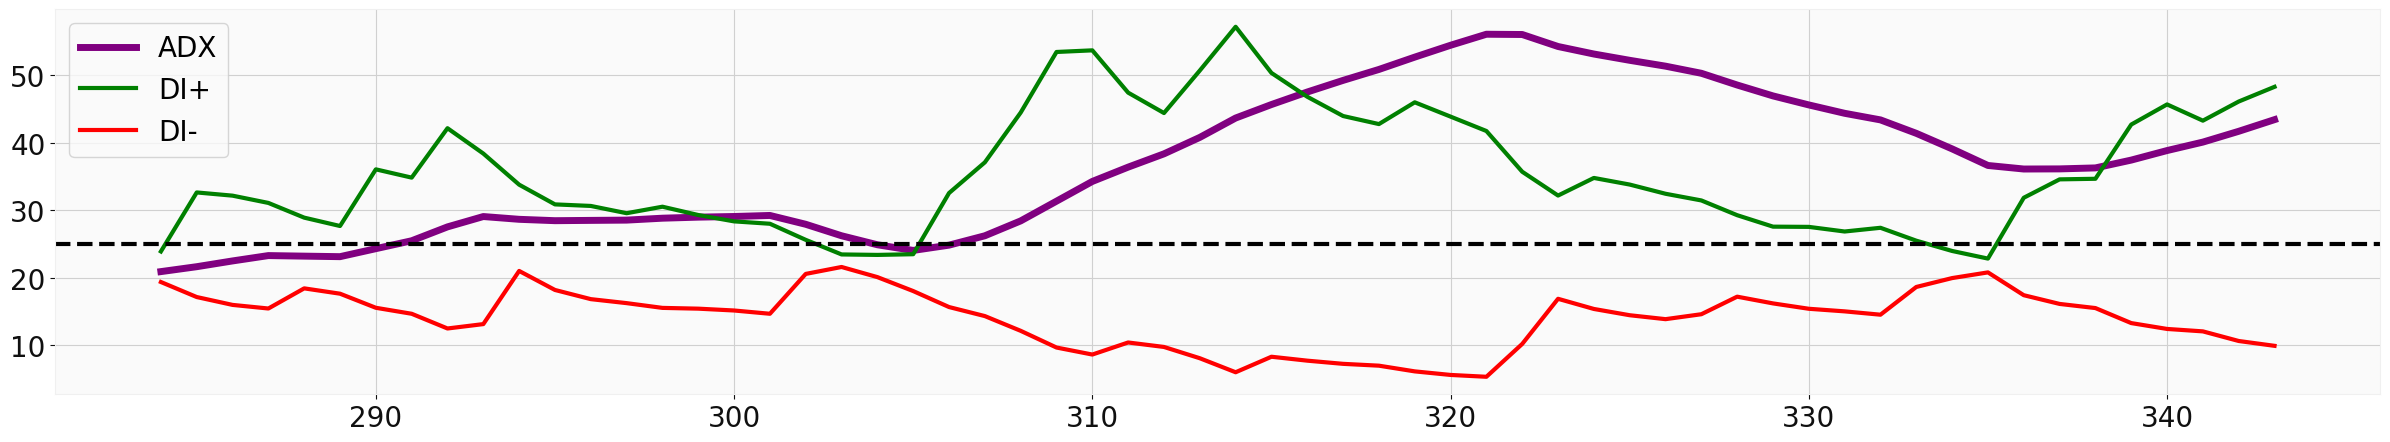

In [ ]:
adx = talib.ADX(inputs['high'], inputs['low'], inputs['close'], timeperiod=14)
di_minus = talib.MINUS_DI(inputs['high'], inputs['low'], inputs['close'], timeperiod=14)
di_plus = talib.PLUS_DI(inputs['high'], inputs['low'], inputs['close'], timeperiod=14)

plt.plot(adx[-60:], color='purple', linewidth=5, label='ADX')
plt.plot(di_plus[-60:], color='green', linewidth=3, label='DI+')
plt.plot(di_minus[-60:], color='red', linewidth=3, label='DI-')
plt.axhline(25, 0, 100, color='black', linestyle='dashed', linewidth=3)
plt.legend(loc=2)
plt.rcParams['figure.figsize'] = [30, 5]
plt.rcParams.update({'font.size': 20})
plt.show()

# Bollinger Bands

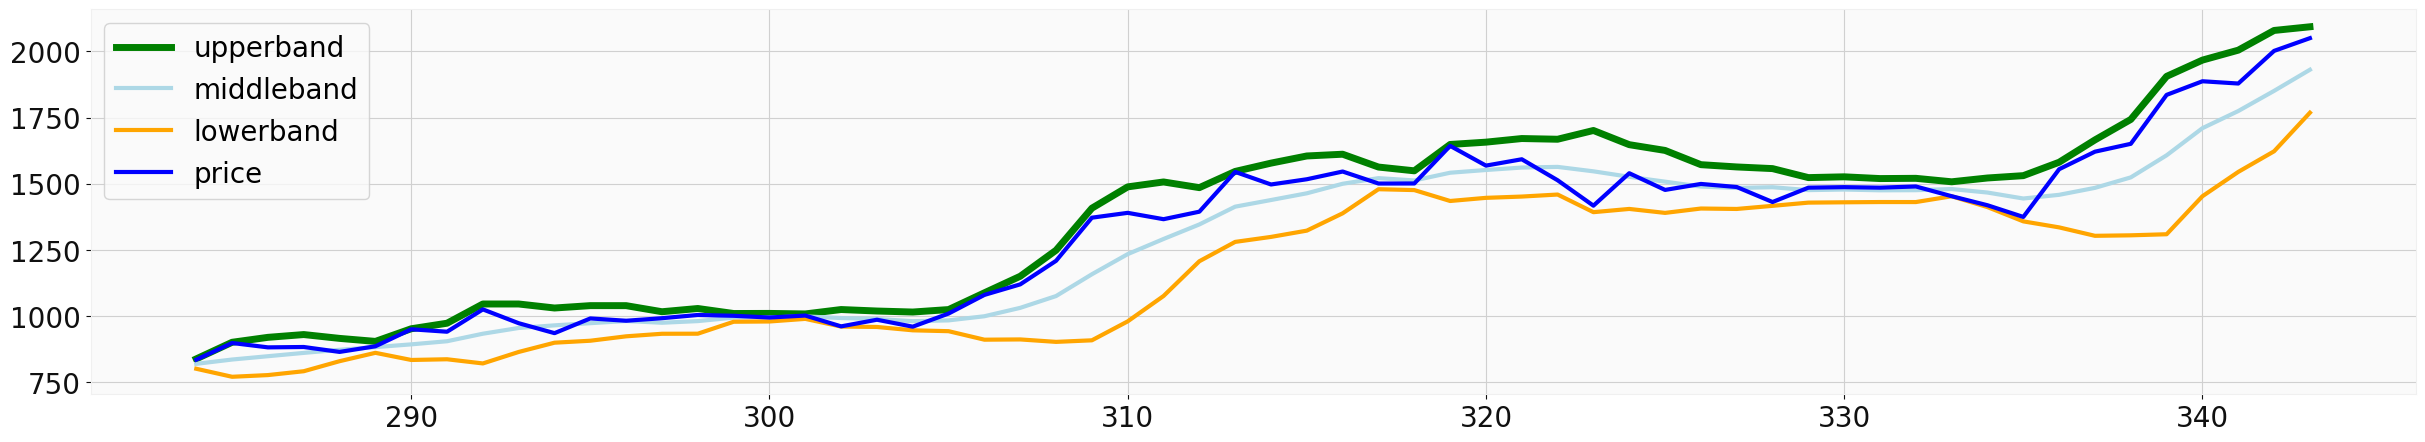

In [ ]:
upperband, middleband, lowerband = talib.BBANDS(inputs['close'], timeperiod=5, nbdevup=2.0, nbdevdn=2.0, matype=0)

plt.plot(upperband[-60:], color='green', linewidth=5, label='upperband')
plt.plot(middleband[-60:], color='lightblue', linewidth=3, label='middleband')
plt.plot(lowerband[-60:], color='orange', linewidth=3, label='lowerband')
plt.plot(inputs['close'][-60:], color='blue', linewidth=3, label='price')
plt.legend(loc=2)
plt.rcParams['figure.figsize'] = [30, 5]
plt.rcParams.update({'font.size': 20})
plt.show()

# Average True Range (ATR)

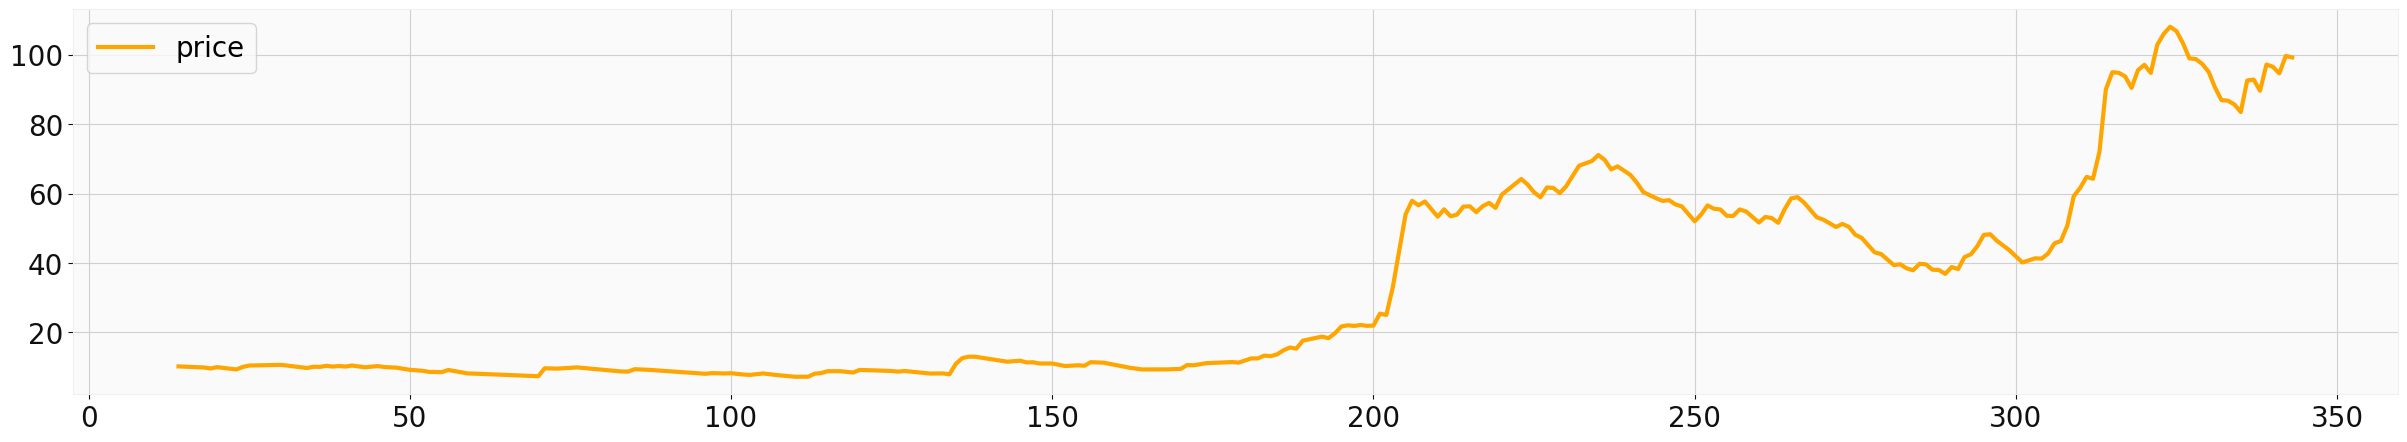

In [ ]:
atr = talib.ATR(inputs['high'], inputs['low'], inputs['close'], timeperiod=14)

plt.plot(atr, color='orange', linewidth=3, label='price')
plt.legend(loc=2)
plt.rcParams['figure.figsize'] = [30, 5]
plt.rcParams.update({'font.size': 20})
plt.show()